In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use(['science','no-latex'])
# import seaborn as sns
# sns.set_theme()

import plotly.express as px
import pandas as pd

In [2]:
data = {}

data["ResNet-50"] = np.load("output/static_imagenet_resnet50.npy")
data["ViT-B/16"] = np.load("output/static_imagenet_vit_base_patch16_224.npy")
data["ConvNeXt-B"] = np.load("output/static_imagenet_convnext_base.npy")

for k, v in data.items():
    data[k] = 100 * v

x = np.arange(0, 1.00001, 0.01)

79.704 75.08
85.026 82.826
85.422 80.49199999999999


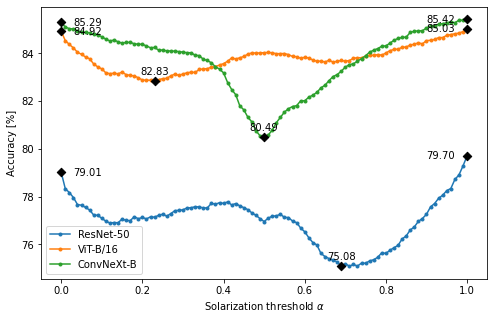

In [34]:
plt.figure(figsize=(8, 5))
for k, v in data.items():
    plt.plot(x, v, label=k, zorder=1, marker=".")
    
    print(v.max(), v.min())
    
    for pos in [0, v.argmin() / (len(x) - 1), 1]:
        
        array_index = int(np.round(pos * (len(x) - 1)))
        
        hoff = 0
        voff = 0
        if pos == 0:
            ha = "left"
            hoff = 0.03
        elif pos == 1:
            ha = "right"
            hoff = -0.03
        else:
            ha = "center"
            voff = 0.4
        
        plt.scatter(pos, v[array_index], marker="D", color="black", zorder=2)
        plt.text(pos + hoff, v[array_index] + voff, s=f"{v[array_index]:.2f}", 
                 horizontalalignment=ha, verticalalignment="center", zorder=2)
    
plt.legend(facecolor="w")
plt.ylabel("Accuracy [%]")
plt.xlabel(r"Solarization threshold $\alpha$")
plt.savefig('output/imagenet_nonadv_sol.pdf', bbox_inches='tight', pad_inches=0)
pass

In [14]:
fig = px.line(
    pd.DataFrame.from_dict(data, orient="columns"),
    labels={
        "value": "Accuracy [%]",
        "index": r"Solarization Threshold",
        "variable": "Model",
    },
    width=970 * 0.65,
    height=600 * 0.65,
    
)
fig.update_layout(
   legend=dict(
            yanchor="top",
            y=1.15,
            xanchor="left",
            x=0,
            orientation="h"
        ),
)

fig.update_layout(
        xaxis=dict(
            tickvals=sorted(x),
        )
    )

# fig.for_each_trace(lambda t: t.update(legendrank={"conv3x3": 0, "None": 1}[t.name]))
# fig.for_each_trace(
#     lambda t: t.update(name={"conv3x3": "Frozen Random", "None": "Learnable"}[t.name])
# )
# fig.update_layout(
#     margin=dict(l=0, r=0, b=0, t=0),
# )
# fig.write_image(f"plots/wandb/resnet_freezing.pdf")
fig

TypeError: line() got an unexpected keyword argument 'smooth'

In [53]:
for k, v in data.items():
    print(k)
    print("max", v.max())
    print("max diff", (v.max() - v.min()))
    print("minimum", x[v.argmin()])
    print()

ResNet-50
max 79.704
max diff 4.623999999999995
minimum 0.6900000000000001

ViT-B/16
max 85.026
max diff 2.200000000000003
minimum 0.23

ConvNeXt-B
max 85.422
max diff 4.930000000000007
minimum 0.5

